# COVID-19 확산 추세 분석

## (1) 프로젝트 개요

#### 데이터 출처
https://www.kaggle.com/therealcyberlord/coronavirus-covid-19-visualization-prediction/data

#### Feature 구성

- Country/Region: 국가
- Province/State: 지역/주
- Lat: 지역의 위도
- Long: 지역의 경도
- [ Date ] : 각 날짜의 확진자/사망자 수


##(2) EDA 및 데이터 전처리

### 2-1. 데이터 불러오기

In [1]:
import pandas as pd

In [2]:
df_case = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
df_death = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

In [3]:
df_case.tail()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/23/22,2/24/22,2/25/22,2/26/22,2/27/22,2/28/22,3/1/22,3/2/22,3/3/22,3/4/22
279,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,638172,640214,640214,640214,640214,645947,647203,648039,649110,649971
280,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,510,510,514,514,518,521,524,524,526,530
281,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,11751,11751,11759,11760,11769,11771,11771,11771,11772,11774
282,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,311888,312118,312374,312611,312707,312750,312970,313203,313394,313613
283,NaN,Zimbabwe,-19.015438,29.154857,0,0,0,0,0,0,...,234589,234967,235467,235803,235803,236380,236871,237503,237503,238739


### 2-2. 데이터 구조 변경

데이터프레임의 Date를 Index로, 국가/지역을 Column으로 변경

In [4]:
# 불필요한 컬럼 제거, Date 컬럼의 데이터 타입을 datetime으로 변환, Date를 index로 변경

def fix_dataframe(df):
  df = df.drop(['Lat', 'Long'], axis=1).groupby('Country/Region').sum()
  df = df.transpose()

  df.index.name = 'Date'
  df.reset_index(inplace=True)

  df['Date'] = df['Date'].apply(lambda s: pd.to_datetime(str(s)))
  df.set_index('Date', inplace=True)
  
  return df

In [5]:
df_case = fix_dataframe(df_case)
df_death = fix_dataframe(df_death)

In [6]:
df_case

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,Australia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Winter Olympics 2022,Yemen,Zambia,Zimbabwe
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,0,4,...,0,0,0,0,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-28,173659,271563,264936,37999,98741,11,7437,8900656,419832,3235017,...,842462,236405,19,515124,3443485,645947,521,11771,312750,236380
2022-03-01,173879,271702,265010,38165,98746,11,7447,8904176,420156,3256772,...,844400,236501,19,515124,3557629,647203,524,11771,312970,236871
2022-03-02,174073,271825,265079,38249,98746,11,7449,8912317,420498,3296784,...,846868,236596,19,515582,3709481,648039,524,11771,313203,237503


In [7]:
df_death

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,Australia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Winter Olympics 2022,Yemen,Zambia,Zimbabwe
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-28,7598,3469,6835,151,1900,0,135,126152,8461,5210,...,6985,1635,1,5636,40522,5501,0,2135,3952,5395
2022-03-01,7609,3472,6840,151,1900,0,135,126257,8478,5269,...,6991,1636,1,5636,40338,5513,0,2135,3953,5395
2022-03-02,7617,3474,6843,151,1900,0,135,126390,8493,5316,...,7005,1637,1,5639,40452,5532,0,2135,3955,5396


### 2-3 국가별 데이터 시각화

국가별 확진자 수 및 사망자 수 시각화

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

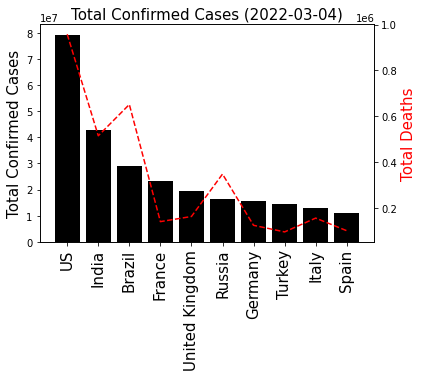

In [9]:
# 최신일자를 기준으로 확진자가 가장 많은 10개국
top_ten_cases = df_case.loc[df_case.index[-1]].sort_values(ascending=False)[:10]
sns.barplot(x=top_ten_cases.index, y=top_ten_cases, color='black')

plt.xticks(rotation=90, size=15)
plt.ylabel('Total Confirmed Cases', size=15)
plt.xlabel('')
plt.title('Total Confirmed Cases (%s)' % top_ten_cases.name.strftime('%Y-%m-%d'), size=15)

ax = plt.gca()
ax2 = ax.twinx()

top_ten_deaths = df_death.loc[df_death.index[-1]][top_ten_cases.index]
ax2.plot(top_ten_deaths.index, top_ten_deaths, 'r--')
ax2.set_ylabel('Total Deaths', color='red', size=15)

plt.show()

In [10]:
# 국가별 시간에 따른 확진자 수 및 사망자 수

def plot_case_with_death(country):
    plt.figure(figsize=(10,5))

    plt.plot(df_case.index, df_case[country], 'b-')
    plt.ylabel('Confirmed Cases', color='blue')
    plt.title(country + ' Cases & Deaths')
    plt.xlabel('Date')
    plt.xlim(right=df_case.index[-1])
    plt.ylim(0, df_case[country].max()*1.1)

    ax = plt.gca()
    ax2 = ax.twinx()
    ax2.plot(df_death.index, df_death[country], 'r--')
    ax2.set_ylabel('Deaths', color='red')
    ax2.set_ylim(0, df_death[country].max()*1.3)

    plt.show()

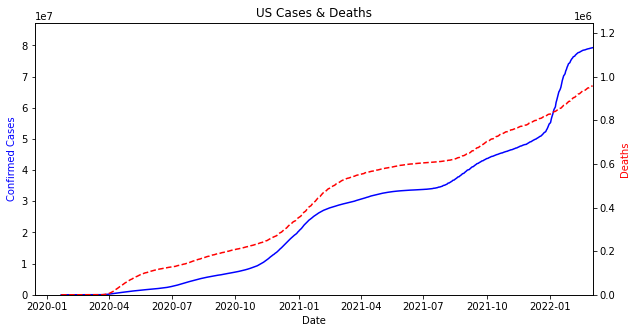

In [11]:
plot_case_with_death('US')

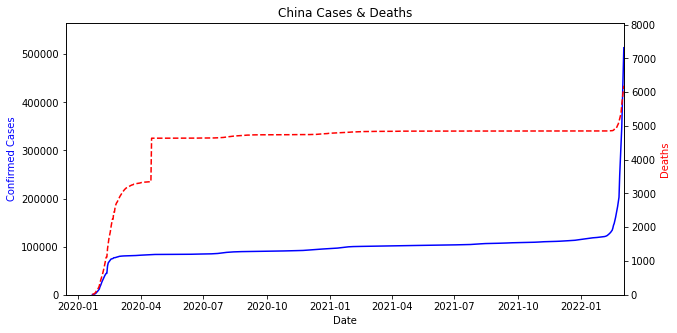

In [12]:
plot_case_with_death('China')

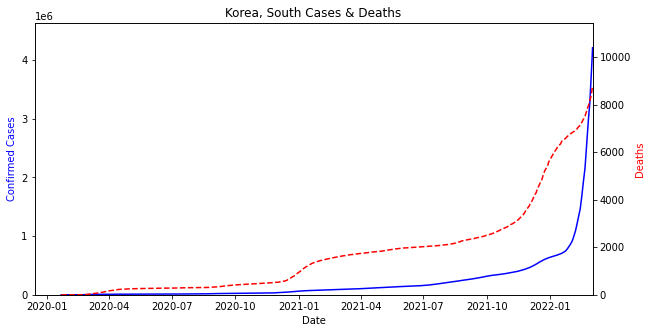

In [13]:
plot_case_with_death('Korea, South')

In [14]:
import plotly.graph_objects as go

In [15]:
# 아래 데이터프레임를 이용하여 국가명을 국가코드로 변경
df_code = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_world_gdp_with_codes.csv')

# 기존 데이터프레임의 국가명과 다르게 표기된 국가의 이름을 먼저 변경한 후에 코드로 변경
country_renamer = {
    'Bahamas':'Bahamas, The',
    'Congo (Brazzaville)':'Congo, Republic of the',
    'Congo (Kinshasa)':'Congo, Democratic Republic of the',
    'Czechia':'Czech Republic',
    'Eswatini':'Swaziland',
    'Gambia':'Gambia, The',
    'North Macedonia':'Macedonia',
    'Taiwan*':'Taiwan',
    'US':'United States',
    'West Bank and Gaza':'West Bank'
}

In [16]:
df_code.head()

,COUNTRY,GDP (BILLIONS),CODE
0,Afghanistan,21.71,AFG
1,Albania,13.40,ALB
2,Algeria,227.80,DZA
3,American Samoa,0.75,ASM
4,Andorra,4.80,AND


In [17]:
df_case.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,Australia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Winter Olympics 2022,Yemen,Zambia,Zimbabwe
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,0,4,...,0,0,0,0,2,0,0,0,0,0


In [18]:
country_to_code = df_code.set_index('COUNTRY')['CODE']

In [19]:
df_c = df_case.rename(country_renamer, axis=1).copy()

for col in df_c.columns:
  if col not in country_to_code.index:
    df_c.drop(col, axis=1, inplace=True)
df_code = df_c.rename(country_to_code, axis=1)

df_code

Country/Region,AFG,ALB,DZA,AND,AGO,ATG,ARG,ARM,AUS,AUT,...,GBR,URY,UZB,VUT,VEN,VNM,WBG,YEM,ZMB,ZWE
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,4,0,...,0,0,0,0,0,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-28,173659,271563,264936,37999,98741,7437,8900656,419832,3235017,2679742,...,19021076,842462,236405,19,515124,3443485,645947,11771,312750,236380
2022-03-01,173879,271702,265010,38165,98746,7447,8904176,420156,3256772,2704530,...,19120746,844400,236501,19,515124,3557629,647203,11771,312970,236871
2022-03-02,174073,271825,265079,38249,98746,7449,8912317,420498,3296784,2744023,...,19166049,846868,236596,19,515582,3709481,648039,11771,313203,237503


Choropleth Map

- 공식 레퍼런스 참조 : https://plotly.com/python/choropleth-maps/#world-choropleth-map

In [20]:
# date에 해당하는 날짜로 데이터 생성

def get_choropleth_data(date):
    data = go.Choropleth(
        locations = df_code.columns,
        z = df_code.loc[date],
        text = df_c.columns,
        colorscale = 'algae_r',
        autocolorscale=False,
        reversescale=True,
        marker_line_color='darkgray',
        marker_line_width=0.5,
        colorbar_tickprefix = '',
        colorbar_title = 'Confirmed Cases',
    )
    return data

In [21]:
date = df_case.index[-1]
data = get_choropleth_data(date)
fig = go.Figure(data=data)
fig.update_layout(
    title_text='Confirmed Cases in ' + str(date),
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    )
)

fig.show()

### 2-4 데이터 전처리

FBProphet 학습을 위한 데이터프레임 생성

In [22]:
# 우리나라의의 확진자 수 데이터를 FBProphet에 학습하기 위한 데이터프레임으로 재구성

df = pd.DataFrame(df_case.reset_index()[['Date', 'Korea, South']].to_numpy(), columns=['ds', 'y'])
df

,ds,y
0,2020-01-22,1
1,2020-01-23,1
2,2020-01-24,2
3,2020-01-25,2
4,2020-01-26,3
...,...,...
768,2022-02-28,3273449
769,2022-03-01,3492686
770,2022-03-02,3691488
771,2022-03-03,3958326


In [23]:
from math import floor

In [24]:
def train_test_split_df(df, test_size):
  div = floor(df.shape[0] * (1 - test_size))
  return df.loc[:div], df.loc[div + 1:]

In [25]:
train_df, test_df = train_test_split_df(df, 0.2)

In [26]:
train_df.tail()

,ds,y
614,2021-09-27,305842
615,2021-09-28,308725
616,2021-09-29,311289
617,2021-09-30,313773
618,2021-10-01,316020


In [27]:
test_df.head()

,ds,y
619,2021-10-02,318105
620,2021-10-03,319777
621,2021-10-04,321352
622,2021-10-05,323379
623,2021-10-06,325804


## (3) Prophet 모델링

#### 3-1. 모델학습

In [28]:
from fbprophet import Prophet

In [29]:
model = Prophet(changepoint_range=1.0)
model.fit(train_df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


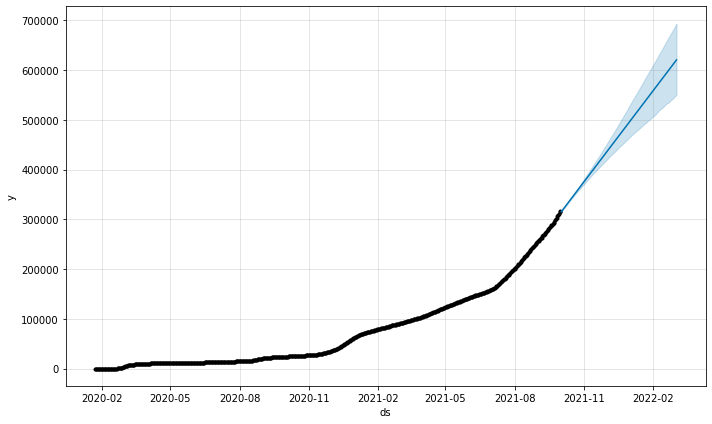

In [30]:
pred = model.predict(test_df)
model.plot(pred);

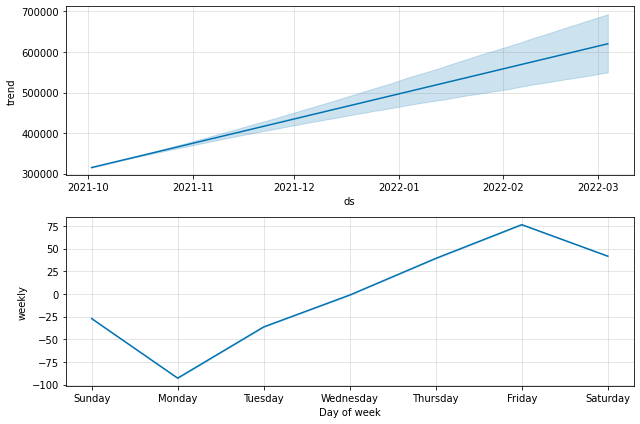

In [31]:
model.plot_components(pred);

In [32]:
from fbprophet.plot import add_changepoints_to_plot

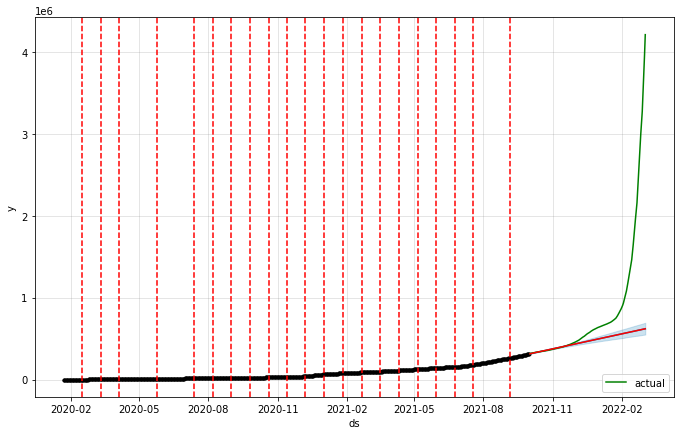

In [34]:
fig = model.plot(pred)
plt.plot(test_df['ds'], test_df['y'], 'g-', label='actual')
changes = add_changepoints_to_plot(fig.gca(), model, pred)
plt.legend();

### 3-2. 모델 성능 측정

In [35]:
from sklearn.metrics import r2_score

In [36]:
pred.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-10-02,315074.458484,314397.584253,315893.524856,315074.458484,315074.458484,41.679912,41.679912,41.679912,41.679912,41.679912,41.679912,0.0,0.0,0.0,315116.138396
1,2021-10-03,317069.436807,316285.322685,317821.929242,317069.436807,317069.436807,-27.086807,-27.086807,-27.086807,-27.086807,-27.086807,-27.086807,0.0,0.0,0.0,317042.350000
2,2021-10-04,319064.415129,318264.060232,319725.540340,319064.415129,319064.415129,-92.754548,-92.754548,-92.754548,-92.754548,-92.754548,-92.754548,0.0,0.0,0.0,318971.660581
3,2021-10-05,321059.393452,320277.046178,321752.399686,321059.393452,321059.393452,-36.305597,-36.305597,-36.305597,-36.305597,-36.305597,-36.305597,0.0,0.0,0.0,321023.087855
4,2021-10-06,323054.371775,322272.049787,323800.956597,323054.371775,323054.371775,-1.165688,-1.165688,-1.165688,-1.165688,-1.165688,-1.165688,0.0,0.0,0.0,323053.206086


In [37]:
print('R2 Score: ', r2_score(test_df['y'], pred['yhat']))

R2 Score:  -0.050660062291841834


향후 30일간의 확진자 수 예측

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


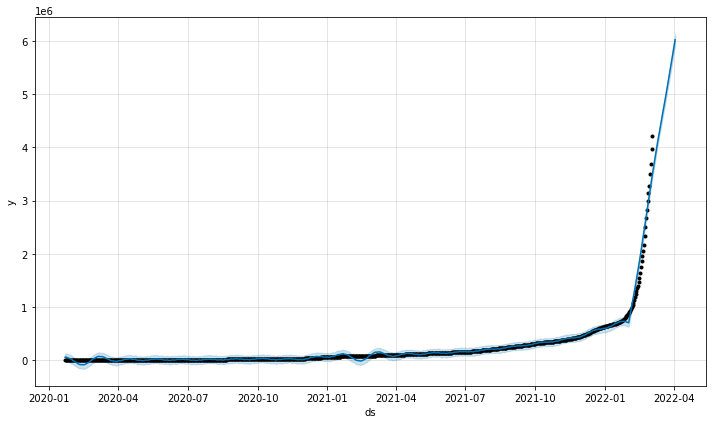

In [38]:
model = Prophet(changepoint_range=1.0)
model.fit(df)

future = model.make_future_dataframe(30)
pred = model.predict(future)

model.plot(pred);

## (4) 분석 결과 해석

R2 Score 값이 음수로 나왔다는 것은, 학습한 데이터가 미래를 예측함에 있어서 사실상 전혀 설명력을 가지고 있지 않음을 의미합니다. 
즉, 지난 2년 동안 누적된 데이터로부터 미래의 확진자 수를 예측하는 것은 불가능합니다.
2022년 이후의 국내 코로나 확진자 수는 기존의 데이터를 기반으로 예측된 범위를 크게 벗어날 정도로 커다란 차이를 보이고 있습니다.
특히 2022년 2월을 기점으로 확진자 숫자가 기하급수적으로 늘어났는데, 의미있는 확진자 수 예측을 위해서는 다른 데이터를 활용하는 것이 좋을 것으로 보입니다.
